## Visualizing Tech Stocks

In this project you will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2019:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOG)
* Facebook (NASDAQ:FB).

Using Pandas, Pandas-Datarader, and Matplotlib, you will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2019. In your analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

#### Step 1: Import Data Manipulation Packages
Import the pandas and numpy module as `pd` and `np`, respectively

In [1]:
import pandas as pd
import numpy as np

#### Step 2: Import Financial Package
Import the pandas data reader module as `web`. (Ensure the module is installed with `pip install pandas-datareader` on the command line)

In [5]:
import pandas_datareader as web

#### Step 3: Import Visualization Package
Import the matplotlib `pyplot` module as `plt`. (Write `%matplotlib inline` below the import statement to allow your visualizations to appear beneath the code that generates them)

In [7]:
import matplotlib.pyplot as plt

### 2. Load the adjusted closings for the top 5 tech stocks.

#### Step 1: Define Stocks
Create a list named `symbols` containing the symbols for the top 5 tech stocks.
#### Step 2: Create Dates
Create a datetime object representing January 1st, 2019 named `start_date` and a datetime object representing July 1st, 2019 named `end_date`.
#### Step 3: Retrieve Data
Call the function `web.get_data_yahoo()` with arguments `symbols`, `start_date` and `end_date` and save the result to `stock_data`.
#### Step 4: View Data
View both `stock_data` and `stock_data['Adj Close']`. What information is stored in these DataFrames?

In [10]:
# Define Stocks, create list "Symbols"
symbols = ["MSFT", "AAPL", "AMZN", "FB", "GOOG"]

# Create Dates
start_date = "2019,01,01"
end_date = "2019, 07, 01"

In [12]:
# Retrieve Data
stock_data = web.get_data_yahoo(symbols, start_date, end_date)

# View Stock Data
stock_data

Attributes   Adj Close                                                   \
Symbols           MSFT       AAPL         AMZN          FB         GOOG   
Date                                                                      
2019-01-02   98.148849  38.439735  1539.130005  135.679993  1045.849976   
2019-01-03   94.538162  34.610851  1500.280029  131.740005  1016.059998   
2019-01-04   98.935059  36.088364  1575.390015  137.949997  1070.709961   
2019-01-07   99.061226  36.008041  1629.510010  138.050003  1068.390015   
2019-01-08   99.779510  36.694466  1656.579956  142.529999  1076.280029   
...                ...        ...          ...         ...          ...   
2019-06-25  130.544037  47.992500  1878.270020  188.839996  1086.349976   
2019-06-26  131.033249  49.030533  1897.829956  187.660004  1079.800049   
2019-06-27  131.248459  49.015808  1904.280029  189.500000  1076.010010   
2019-06-28  131.062592  48.569180  1893.630005  193.000000  1080.910034   
2019-07-01  132.745392  49.459972  1922.189941  193.000000  1097.949951   

Attributes       Close                                                   ...  \
Symbols           MSFT       AAPL         AMZN          FB         GOOG  ...   
Date                                                                     ...   
2019-01-02  101.120003  39.480000  1539.130005  135.679993  1045.849976  ...   
2019-01-03   97.400002  35.547501  1500.280029  131.740005  1016.059998  ...   
2019-01-04  101.930000  37.064999  1575.390015  137.949997  1070.709961  ...   
2019-01-07  102.059998  36.982498  1629.510010  138.050003  1068.390015  ...   
2019-01-08  102.800003  37.687500  1656.579956  142.529999  1076.280029  ...   
...                ...        ...          ...         ...          ...  ...   
2019-06-25  133.429993  48.892502  1878.270020  188.839996  1086.349976  ...   
2019-06-26  133.929993  49.950001  1897.829956  187.660004  1079.800049  ...   
2019-06-27  134.149994  49.935001  1904.280029  189.500000  1076.010010  ...   
2019-06-28  133.960007  49.480000  1893.630005  193.000000  1080.910034  ...   
2019-07-01  135.679993  50.387501  1922.189941  193.000000  1097.949951  ...   

Attributes        Open                                                   \
Symbols           MSFT       AAPL         AMZN          FB         GOOG   
Date                                                                      
2019-01-02   99.550003  38.722500  1465.199951  128.990005  1016.570007   
2019-01-03  100.099998  35.994999  1520.010010  134.690002  1041.000000   
2019-01-04   99.720001  36.132500  1530.000000  134.009995  1032.589966   
2019-01-07  101.639999  37.174999  1602.310059  137.559998  1071.500000   
2019-01-08  103.040001  37.389999  1664.689941  139.889999  1076.109985   
...                ...        ...          ...         ...          ...   
2019-06-25  137.250000  49.607498  1911.839966  192.880005  1112.660034   
2019-06-26  134.350006  49.442501  1892.479980  189.539993  1086.500000   
2019-06-27  134.139999  50.072498  1902.000000  189.880005  1084.000000   
2019-06-28  134.570007  49.669998  1909.099976  190.550003  1076.390015   
2019-07-01  136.630005  50.792500  1922.979980  195.210007  1098.000000   

Attributes      Volume                                                 
Symbols           MSFT         AAPL       AMZN          FB       GOOG  
Date                                                                   
2019-01-02  35329300.0  148158800.0  7983100.0  28146200.0  1532600.0  
2019-01-03  42579100.0  365248800.0  6975600.0  22717900.0  1841100.0  
2019-01-04  44060600.0  234428400.0  9182600.0  29002100.0  2093900.0  
2019-01-07  35656100.0  219111200.0  7993200.0  20089300.0  1981900.0  
2019-01-08  31514400.0  164101200.0  8881400.0  26263800.0  1764900.0  
...                ...          ...        ...         ...        ...  
2019-06-25  33327400.0   84281200.0  3012300.0  16750300.0  1546900.0  
2019-06-26  23657700.0  104270000.0  2441900.0  12808600.

In [13]:
# View Adj Close
stock_data['Adj Close']

Symbols,MSFT,AAPL,AMZN,FB,GOOG
Date,,,,,
2019-01-02,98.148849,38.439735,1539.130005,135.679993,1045.849976
2019-01-03,94.538162,34.610851,1500.280029,131.740005,1016.059998
2019-01-04,98.935059,36.088364,1575.390015,137.949997,1070.709961
2019-01-07,99.061226,36.008041,1629.510010,138.050003,1068.390015
2019-01-08,99.779510,36.694466,1656.579956,142.529999,1076.280029
...,...,...,...,...,...
2019-06-25,130.544037,47.992500,1878.270020,188.839996,1086.349976
2019-06-26,131.033249,49.030533,1897.829956,187.660004,1079.800049
2019-06-27,131.248459,49.015808,1904.280029,189.500000,1076.010010


### 3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time. Set the x label to `"Date"`. Set the y label to `"Adjusted Closing Price Over Time"`. Set the graph title to `"Tech Stocks Adjusted Price"`.

Text(0.5, 1.0, 'Tech Stocks Adjusted Price')

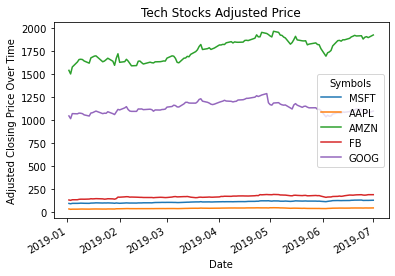

In [15]:
# Create plot of Adj Closing Prices Over Time
stock_data_closing_prices = stock_data['Adj Close']
stock_data_closing_prices.plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price Over Time")
plt.title("Tech Stocks Adjusted Price")


### 4. Calculate and plot the daily simple rate of return over time.
Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 

Text(0.5, 1.0, 'Rate of Return Over Time')

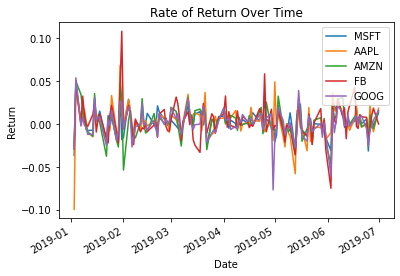

In [18]:
# Create Plot of Daily Simple Rate of Return
daily_return = stock_data["Adj Close"].pct_change()
daily_return.plot()
plt.legend(loc=1)
plt.xlabel("Date")
plt.ylabel("Return")
plt.title("Rate of Return Over Time")

### 5. Create subplots of daily simple rate of return.
In order to better visualize the daily returns, create a subplot for each tech stock. 

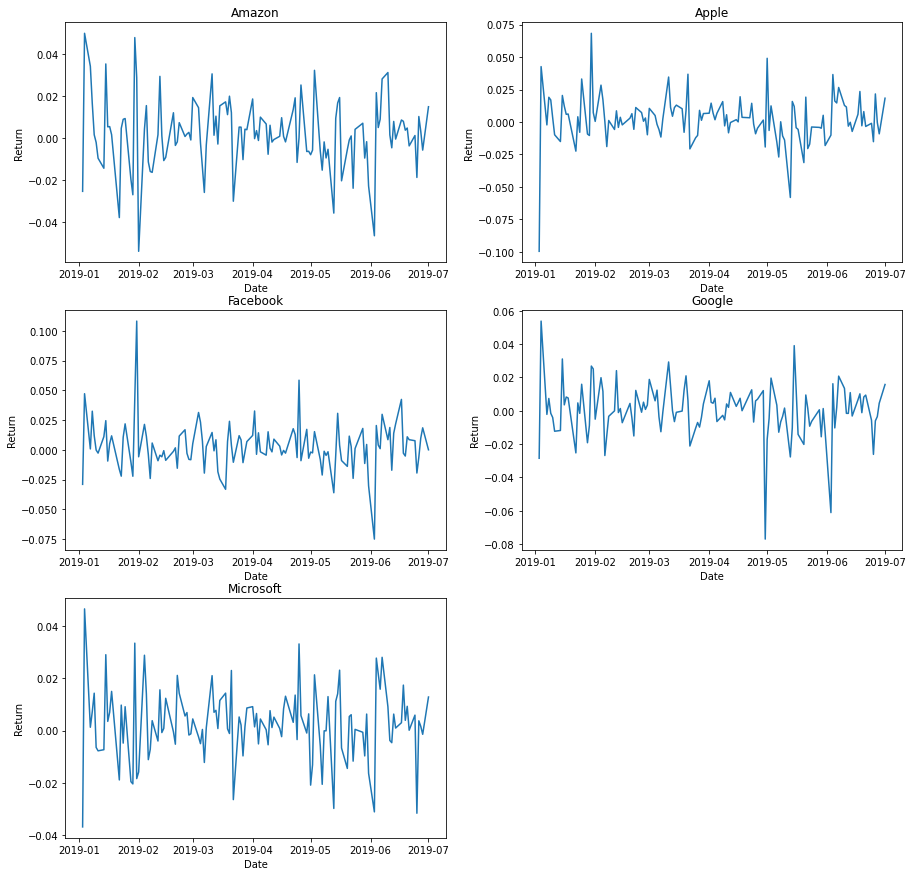

In [39]:
# Create a subplot for each Stock

# Establishing Subplot
fig = plt.figure(figsize=(15,15))

# AMZN
ax1 = fig.add_subplot(321)
ax1.plot(daily_return["AMZN"])
plt.xlabel("Date")
plt.ylabel("Return")
ax1.set_title("Amazon")

# AAPL
ax2 = fig.add_subplot(322)
ax2.plot(daily_return["AAPL"])
plt.xlabel("Date")
plt.ylabel("Return")
ax2.set_title("Apple")

# Facebook
ax3 = fig.add_subplot(323)
ax3.plot(daily_return["FB"])
plt.xlabel("Date")
plt.ylabel("Return")
ax3.set_title("Facebook")

# Google
ax4 = fig.add_subplot(324)
ax4.plot(daily_return["GOOG"])
plt.xlabel("Date")
plt.ylabel("Return")
ax4.set_title("Google")

# Microsoft
ax5 = fig.add_subplot(325)
ax5.plot(daily_return["MSFT"])
plt.xlabel("Date")
plt.ylabel("Return")
ax5.set_title("Microsoft")

plt.show()

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

#### Step 1: Calculate mean rate of return
For each stock, calculate the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately
#### Step 3: Analyze mean rate of return
Based on the mean rate of return, which stock would be the best option to invest in?

In [37]:
# Calculate Mean Rate of Return
daily_mean = daily_return.mean()

daily_mean

Symbols
MSFT    0.002532
AAPL    0.002208
AMZN    0.001933
FB      0.003046
GOOG    0.000522
dtype: float64

In [38]:
# daily mean index for x axis
daily_mean.keys()

Index(['MSFT', 'AAPL', 'AMZN', 'FB', 'GOOG'], dtype='object', name='Symbols')

In [43]:
# grab each daily mean value for the y axis
height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])

height

[0.0025323653453407906,
 0.0022079985556792314,
 0.001933041498626496,
 0.003045827604161545,
 0.0005215519241295212]

In [ ]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_mean.keys()))
x_pos

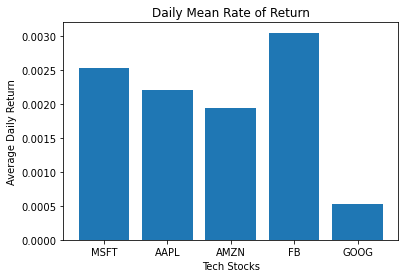

In [47]:
# plot bars
plt.bar(x_pos, height)

# create names on the x axis
plt.xticks(x_pos, daily_mean.keys())

# label Chart
plt.xlabel("Tech Stocks")
plt.ylabel("Average Daily Return")
plt.title("Daily Mean Rate of Return")

# show graphic
plt.show()



Facebook has the highest mean simple rate of return between the period of data collected: 1-1-2019 and 7-1-2019.
This indicates that Facebook would have been a good investment over this time period. Alternatively, Google maintained the lowest mean simple rate of return over this same period. 


### 7. Calculate and plot the variance.

#### Step 1: Calculate the variance
For each stock, calculate the variance of the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately
#### Step 3: Analyse the variance
Based on the variance, which stock would be the riskiest to invest in?

In [48]:
# Calculate the variance for each stock
daily_var = daily_return.var()

daily_var

Symbols
MSFT    0.000191
AAPL    0.000345
AMZN    0.000280
FB      0.000408
GOOG    0.000258
dtype: float64

In [50]:
# daily var index for x axis
daily_var.keys()

Index(['MSFT', 'AAPL', 'AMZN', 'FB', 'GOOG'], dtype='object', name='Symbols')

In [51]:
# grab each variance value for the y axis
height = []
for key in daily_var.keys():
    height.append(daily_var[key])
height

[0.00019050819038507095,
 0.00034505827953166824,
 0.00028028212677430473,
 0.0004084227325304589,
 0.00025817910104925987]

In [52]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_var.keys()))
x_pos

array([0, 1, 2, 3, 4])

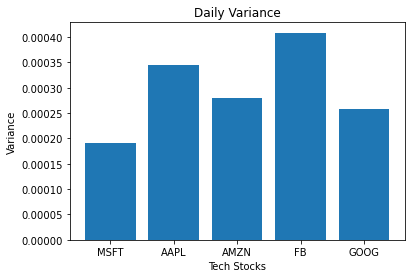

In [55]:
# plot bar chart
plt.bar(x_pos, height)

# create names on x axis
plt.xticks(x_pos, daily_var.keys())

# create chart labels
plt.xlabel("Tech Stocks")
plt.ylabel("Variance")
plt.title("Daily Variance")

# show graphic
plt.show()


Facebook shows the highest variance of all of the stocks, which indicates that it can be a riskier investment. On the other hand, Microsoft shows the lowest variance, indicating that the returns are more predictable. The results given between the "Daily Rate of Return" chart and the "Daily Variance" chart do not necessarily play to the typical narrative of "greater risk-greater return", and "lower risk-lower return" because Microsoft had the second highest return, but the lowest variance (risk).


### 8. Calculate and plot the standard deviation

#### Step 1: Calculate the standard deviation
For each stock, calculate the standard deviation of the mean daily simple rate of return.

#### Step 2: Plot the bar chart
Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately

#### Step 3: Analyze the standard deviation
Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?

In [56]:
# calculate the standard deviation
std_dev = daily_return.std()
std_dev

Symbols
MSFT    0.013802
AAPL    0.018576
AMZN    0.016742
FB      0.020209
GOOG    0.016068
dtype: float64

In [57]:
# daily std index for x axis
std_dev.keys()

Index(['MSFT', 'AAPL', 'AMZN', 'FB', 'GOOG'], dtype='object', name='Symbols')

In [58]:
# grab each std dev value for the y axis
height = []
for key in std_dev.keys():
    height.append(std_dev[key])
height

[0.013802470444999002,
 0.018575744387013628,
 0.01674162855800787,
 0.020209471357026113,
 0.01606795260913038]

In [59]:
# arrange keys on x axis based on length
x_pos = np.arange(len(std_dev.keys()))
x_pos

array([0, 1, 2, 3, 4])

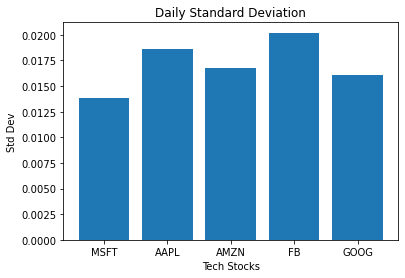

In [62]:
# plot bar chart
plt.bar(x_pos, height)

# create names on x axis
plt.xticks(x_pos, std_dev.keys())

# label chart
plt.xlabel("Tech Stocks")
plt.ylabel("Std Dev")
plt.title("Daily Standard Deviation")

# show graphic
plt.show()

The answer to which stock is the best investment depends on your investment preferences and level of risk tolerance. Facebook is the most volatile stock, as is displayed through the "Daily Standard Deviation" bar chart. Thus by investing in Facebook, you must be willing to take on a greater level of risk. That being said, Facebook has the largest mean return, indicating that by investing in it, you could possibly recieve a greater level of return. Alternatively, Microsoft is the least volatile stock, yet maintains the second greatest rate of return in relation to the other Tech Stocks in this study. 


### 9. Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

In [64]:
daily_return.corr()

Symbols,MSFT,AAPL,AMZN,FB,GOOG
Symbols,,,,,
MSFT,1.000000,0.652943,0.731492,0.454093,0.636986
AAPL,0.652943,1.000000,0.610110,0.438761,0.569773
AMZN,0.731492,0.610110,1.000000,0.572073,0.721504
FB,0.454093,0.438761,0.572073,1.000000,0.633440
GOOG,0.636986,0.569773,0.721504,0.633440,1.000000


None of the stocks are negatively correlated. Amazon and Microsoft are highly correlated, while Facebook and Apple exhibit the lowest correlation.
